In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset: Heart Failuer Clinical Records

In [3]:
df = pd.read_csv(r'C:\Users\Aniket\Downloads\heart_failure_clinical_records_dataset.csv')

### Variables Table
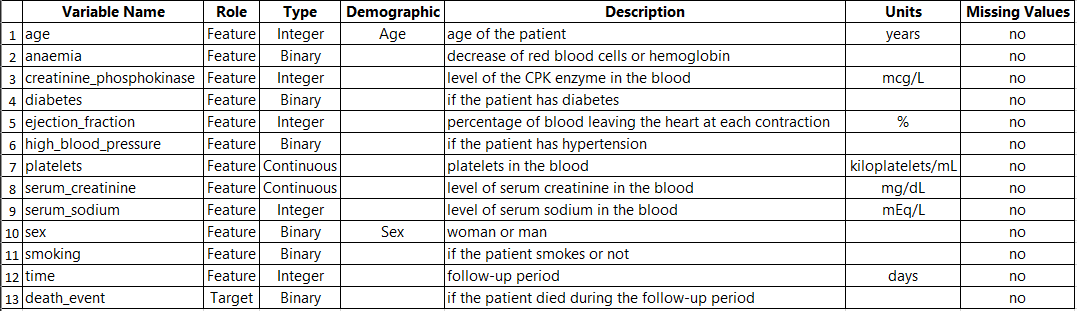


In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.shape

(299, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
# checking for the null values 
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### Here DEATH EVENT is target column
we can check the proportion of the each column to the Target column

<Axes: >

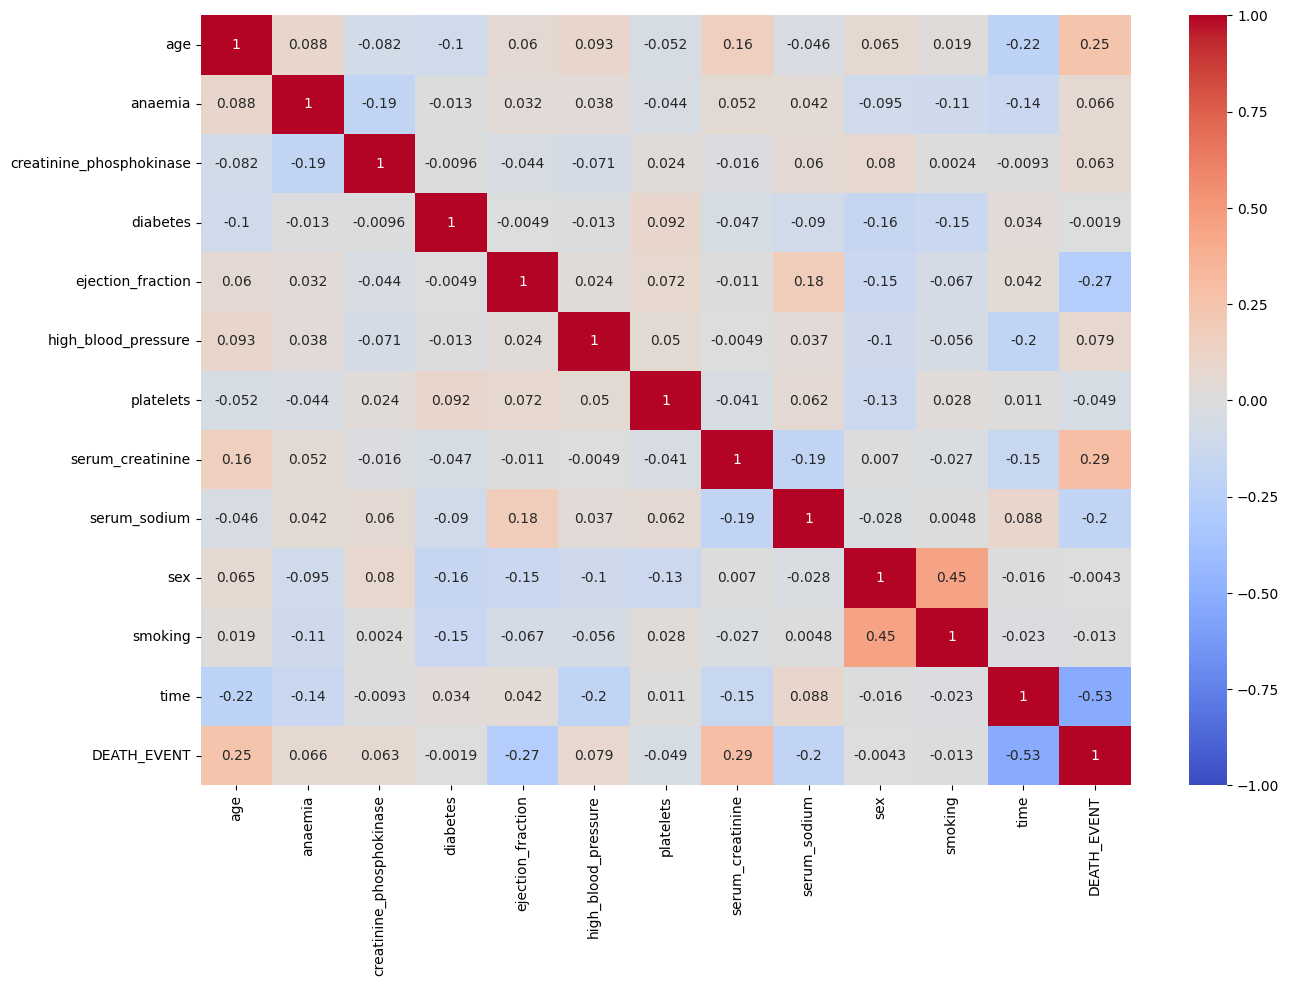

In [8]:
# we can check correlation by using heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), vmin=-1, cmap= 'coolwarm', annot= True)

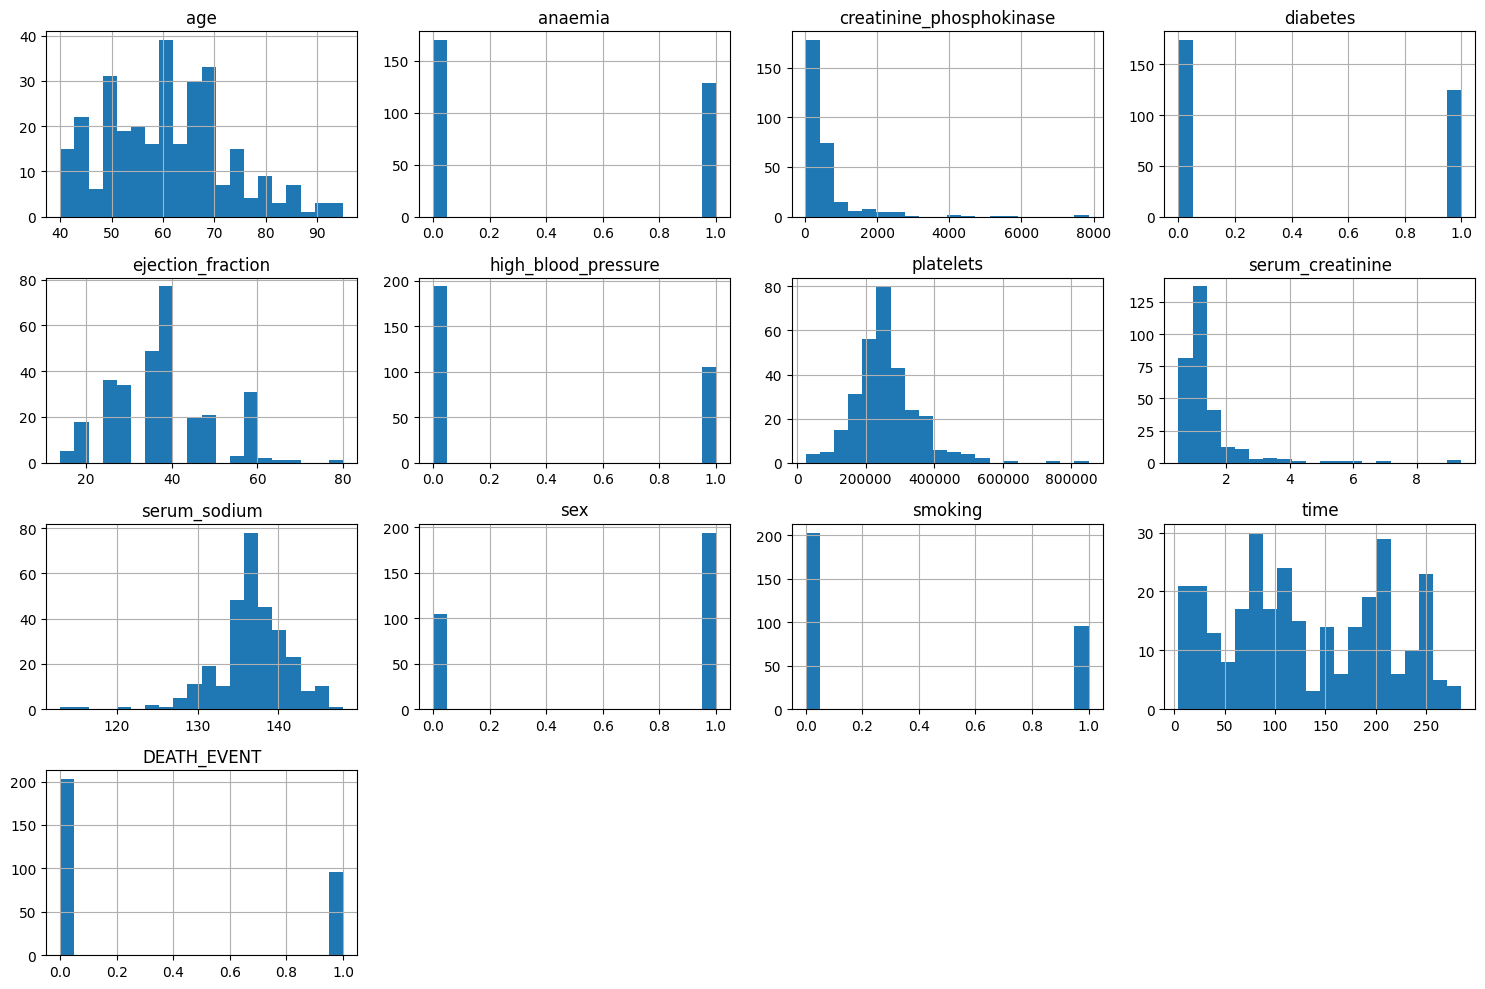

In [9]:
df.hist(bins=20, figsize=(15,10), layout=(4,4))
plt.tight_layout()
plt.show()

In [10]:
correlation_matrix = df.corr()
target_correlation = correlation_matrix['DEATH_EVENT']
target_correlation * 100

age                          25.372854
anaemia                       6.627010
creatinine_phosphokinase      6.272816
diabetes                     -0.194288
ejection_fraction           -26.860331
high_blood_pressure           7.935106
platelets                    -4.913887
serum_creatinine             29.427756
serum_sodium                -19.520360
sex                          -0.431638
smoking                      -1.262315
time                        -52.696378
DEATH_EVENT                 100.000000
Name: DEATH_EVENT, dtype: float64

In [11]:
low_correlation_columns = target_correlation[abs(target_correlation*100) < 10].index
print(low_correlation_columns)

Index(['anaemia', 'creatinine_phosphokinase', 'diabetes',
       'high_blood_pressure', 'platelets', 'sex', 'smoking'],
      dtype='object')


In [12]:
df_modified = df.drop(columns=low_correlation_columns)

In [13]:
df_modified

,age,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,75.0,20,1.9,130,4,1
1,55.0,38,1.1,136,6,1
2,65.0,20,1.3,129,7,1
3,50.0,20,1.9,137,7,1
4,65.0,20,2.7,116,8,1
...,...,...,...,...,...,...
294,62.0,38,1.1,143,270,0
295,55.0,38,1.2,139,271,0
296,45.0,60,0.8,138,278,0
297,45.0,38,1.4,140,280,0


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [15]:
X = df_modified.drop(columns=['DEATH_EVENT'])
y = df_modified['DEATH_EVENT']

In [16]:
X

,age,ejection_fraction,serum_creatinine,serum_sodium,time
0,75.0,20,1.9,130,4
1,55.0,38,1.1,136,6
2,65.0,20,1.3,129,7
3,50.0,20,1.9,137,7
4,65.0,20,2.7,116,8
...,...,...,...,...,...
294,62.0,38,1.1,143,270
295,55.0,38,1.2,139,271
296,45.0,60,0.8,138,278
297,45.0,38,1.4,140,280


In [17]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=50)

In [19]:
svc_linear = SVC(kernel='linear')
svc_poly = SVC(kernel='poly')
svc_rbf = SVC(kernel='rbf')
svc_sigmoid = SVC(kernel='sigmoid') # it is using when o/p is 0 or 1

In [20]:
# train the model Linear Model
svc_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [21]:
# train the model Poly Model
svc_poly.fit(X_train, y_train)

SVC(kernel='poly')

In [22]:
# train the model rbf Model
svc_rbf.fit(X_train, y_train)

SVC()

In [23]:
# train the model sigmoid Model
svc_sigmoid.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [24]:
# Evaluation
y_pred_linear = svc_linear.predict(X_test)
y_pred_poly = svc_poly.predict(X_test)
y_pred_rbf = svc_rbf.predict(X_test)
y_pred_sigmoid = svc_sigmoid.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
X1 = accuracy_score(y_test,y_pred_linear)*100
X2 = accuracy_score(y_test,y_pred_poly)*100
X3 = accuracy_score(y_test,y_pred_rbf)*100
X4 = accuracy_score(y_test,y_pred_sigmoid)*100

In [27]:
accuracy_score = {
    'variable': ['linear', 'poly', 'rbf', 'sigmoid'],
    'values': [X1, X2, X3, X4]
}

accuracy_score = pd.DataFrame(accuracy_score)

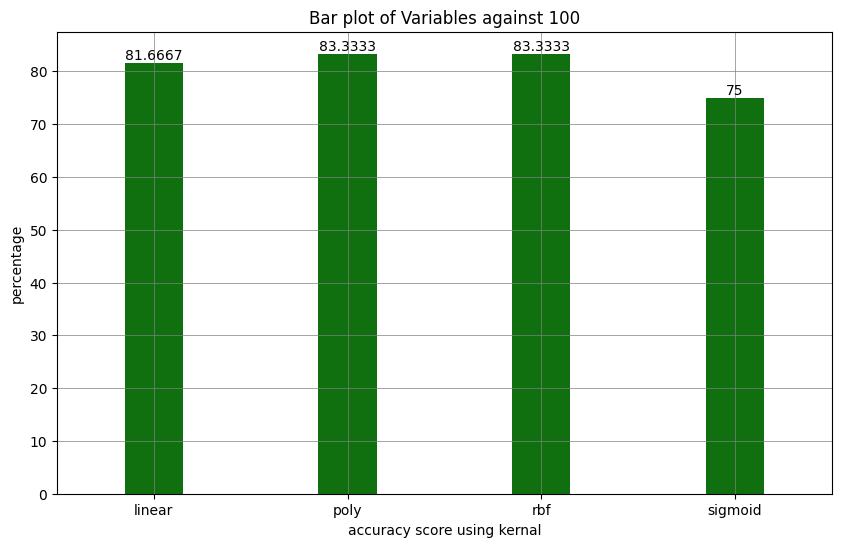

In [41]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='variable', y= 'values', data= accuracy_score, color='green', width=0.3)
ax.bar_label(ax.containers[0])
plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='gray')
plt.title('Bar plot of Variables against 100')
plt.xlabel('accuracy score using kernal')
plt.ylabel('percentage')
plt.show()

In [29]:
# Here we can use rbf or poly which is having maximum accuracy
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
cm = confusion_matrix(y_test, y_pred_poly)

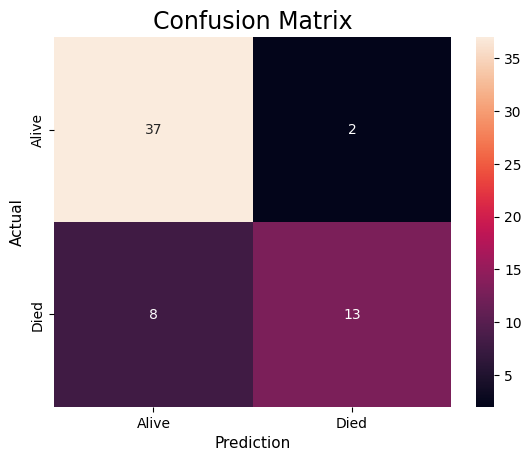

In [31]:
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Alive','Died'],
            yticklabels=['Alive','Died'])
plt.xlabel('Prediction',fontsize=11)
plt.ylabel('Actual',fontsize=11)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [32]:
print(classification_report(y_test, y_pred_poly))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88        39
           1       0.87      0.62      0.72        21

    accuracy                           0.83        60
   macro avg       0.84      0.78      0.80        60
weighted avg       0.84      0.83      0.83        60



In [43]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [65]:
Sample = {'age': 33,	
          'ejection_fraction':20,	
          'serum_creatinine':1.9,
          'serum_sodium':130,	
          'time':100}

In [66]:
type(Sample)

dict

In [67]:
Sample = pd.DataFrame([Sample])

In [68]:
Sample

,age,ejection_fraction,serum_creatinine,serum_sodium,time
0,33,20,1.9,130,100


In [70]:
def result(text):
    if int(text) == 0:
        answer = 'Death Event: False'
    else:
        answer = 'Death Event: False'
    return answer

In [76]:
import warnings

In [79]:
warnings.filterwarnings("ignore")
result(svc_poly.predict(Sample[:1]))

'Death Event: False'